In [51]:
from pytrends.request import TrendReq
import pandas as pd
import cbsodata
import re
import calendar
import datetime
import matplotlib.pyplot as plt

In [ ]:
month_to_nr = list(calendar.month_name)
gov = cbsodata.get_data('83102ENG')

In [157]:
pytrends = TrendReq()
kw_list = ["притулок"]
pytrends.build_payload(kw_list, cat=0, timeframe='2013-01-01 2022-03-31', geo='UA', gprop='')

date
2013-01-01     16
2013-02-01     10
2013-03-01     16
2013-04-01     18
2013-05-01      8
             ... 
2021-11-01     27
2021-12-01     24
2022-01-01     22
2022-02-01     38
2022-03-01    100
Name: притулок, Length: 111, dtype: int32


<AxesSubplot:xlabel='date'>

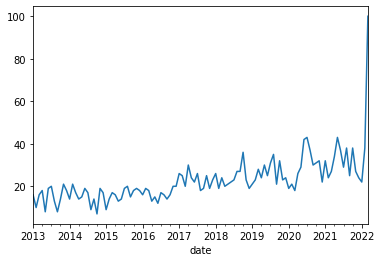

In [158]:
trends = pytrends.interest_over_time().притулок
print(trends)
trends = trends.rename("searches")
trends.plot()

In [153]:
gov_2 = [[entry['TotalAsylumRequests_1'], entry['Periods']] for entry in gov
     if entry['Nationality'] == 'Ukrainian' 
         and re.match("^(\w*) (\w*)$", entry['Periods'])
         and entry['Age'] == 'Total'
         and entry['Sex'] == 'Total male and female ']

<AxesSubplot:>

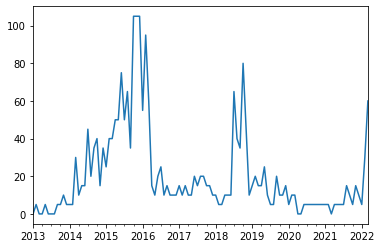

In [154]:
gov_3 = [[entry[0], re.split("^(\w*) (\w*)$", entry[1])[1:3]] for entry in gov_2]
gov_4 = [[entry[0], [int(entry[1][0]), month_to_nr.index(entry[1][1])]] for entry in gov_3]
gov_5no   = [entry[0] for entry in gov_4]
gov_5date = [datetime.datetime(entry[1][0], entry[1][1], 1) for entry in gov_4]
gov_pd = pd.Series(data=gov_5no, index=gov_5date, name='requests')
gov_pd.plot()

<AxesSubplot:>

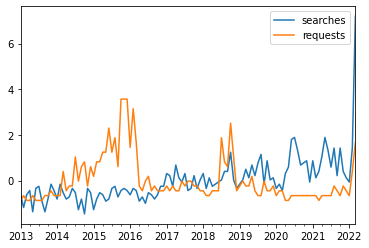

In [159]:
all = pd.concat([trends, gov_pd], axis=1)
norma_all = (all - all.mean()) / all.std()
norma_all.plot()